**Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Data Summary:**

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:
1. Actinic keratosis
2. Basal cell carcinoma
3. Dermatofibroma
4. Melanoma
5. Nevus
6. Pigmented benign keratosis
7. Seborrheic keratosis
8. Squamous cell carcinoma
9. Vascular lesion

Project Pipeline
- Data Reading/Data Understanding → Defining the path for train and test images
- Dataset Creation→ Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.
- Dataset visualisation → Create a code to visualize one instance of all the nine classes present in the dataset
- Model Building & training :
  - Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
  - Choose an appropriate optimiser and loss function for model training
  - Train the model for ~20 epochs
  - Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.
- Chose an appropriate data augmentation strategy to resolve underfitting overfitting
- Model Building & training on the augmented data :
- Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).
Choose an appropriate optimiser and loss function for model training
Train the model for ~20 epochs
Write your findings after the model fit, see if the earlier issue is resolved or not?
Class distribution: Examine the current class distribution in the training dataset
- Which class has the least number of samples?
- Which classes dominate the data in terms of the proportionate number of samples?
Handling class imbalances: Rectify class imbalances present in the training dataset with Augmentor library.
Model Building & training on the rectified class imbalance data :
Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
Choose an appropriate optimiser and loss function for model training
Train the model for ~30 epochs
Write your findings after the model fit, see if the issues are resolved or not?


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Importing Skin Cancer Data

### Importing all the important libraries

In [2]:
# !pip install tensorflow==2.8

In [3]:
# !pip install keras

In [72]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
import random
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img
import warnings
warnings.filterwarnings('ignore')

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [73]:
!pip install pathlib
import pathlib

In [74]:
# I have manually moved Train and Test images to CNN_assignment folder and got rid of the subfolder

In [75]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
root_path = '/content/gdrive/My Drive/Colab Notebooks/CNN_assignment'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [76]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [77]:
# Dataset Creation→ Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.
batch_size = 32
img_height = 180
img_width = 180
rnd_seed = 123
random.seed(rnd_seed)

Use 80% of the images for training, and 20% for validation.

In [78]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [79]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [80]:
## Write your test dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 106 files for validation.


In [21]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

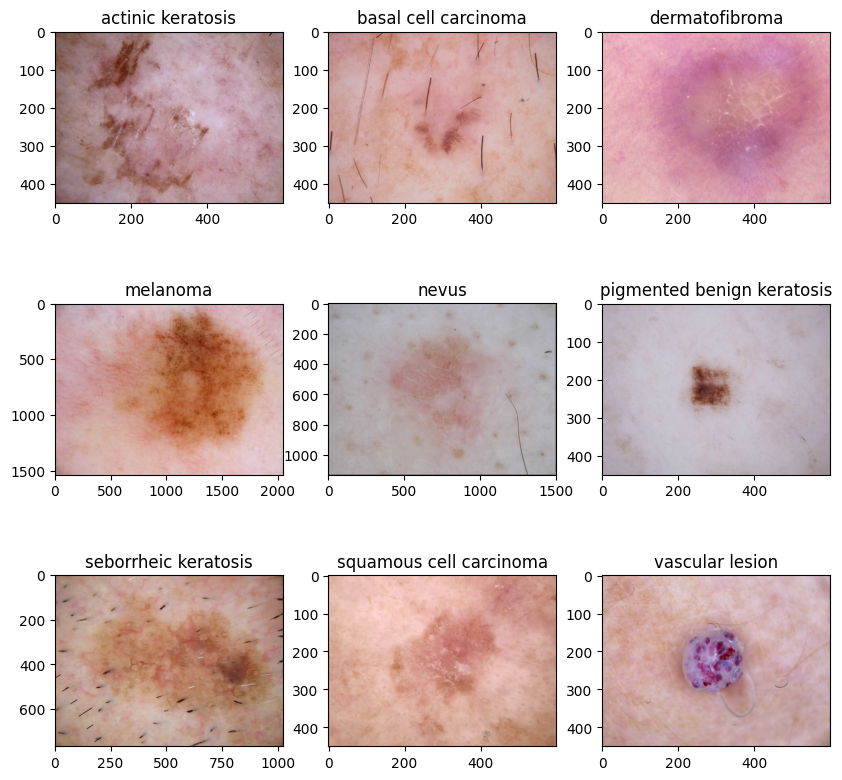

In [81]:
import matplotlib.pyplot as plt
num_classes = len(class_names)
plt.figure(figsize=(10,10))
for i in range(num_classes):
  plt.subplot(3,3,i+1)
  image = img.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [82]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 180, 180, 3)
(32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [83]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model 1
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [90]:
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling \
                    (1.0/255,input_shape=(img_height,img_width,3))])

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))
opt = Adam(learning_rate=0.001)


In [91]:
# Compiling the model
model.compile(optimizer= opt,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [92]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 45, 45, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 45, 45, 128)      

In [93]:
# Train the model for ~20 epochs

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 28s 180ms/step - loss: 2.1254 - accuracy: 0.2221 - val_loss: 1.8838 - val_accuracy: 0.2908
Epoch 2/20
56/56 [==============================] - 2s 44ms/step - loss: 1.8427 - accuracy: 0.3052 - val_loss: 1.7350 - val_accuracy: 0.3579
Epoch 3/20
56/56 [==============================] - 2s 44ms/step - loss: 1.6572 - accuracy: 0.3962 - val_loss: 1.6727 - val_accuracy: 0.3848
Epoch 4/20
56/56 [==============================] - 2s 44ms/step - loss: 1.5667 - accuracy: 0.4325 - val_loss: 1.5183 - val_accuracy: 0.4519
Epoch 5/20
56/56 [==============================] - 3s 50ms/step - loss: 1.5471 - accuracy: 0.4503 - val_loss: 1.5175 - val_accuracy: 0.4877
Epoch 6/20
56/56 [==============================] - 3s 50ms/step - loss: 1.4490 - accuracy: 0.4771 - val_loss: 1.4972 - val_accuracy: 0.5145
Epoch 7/20
56/56 [==============================] - 3s 45ms/step - loss: 1.3927 - accuracy: 0.5162 - val_loss: 1.3771 - val_accuracy: 0.5324
Epoch 8/20


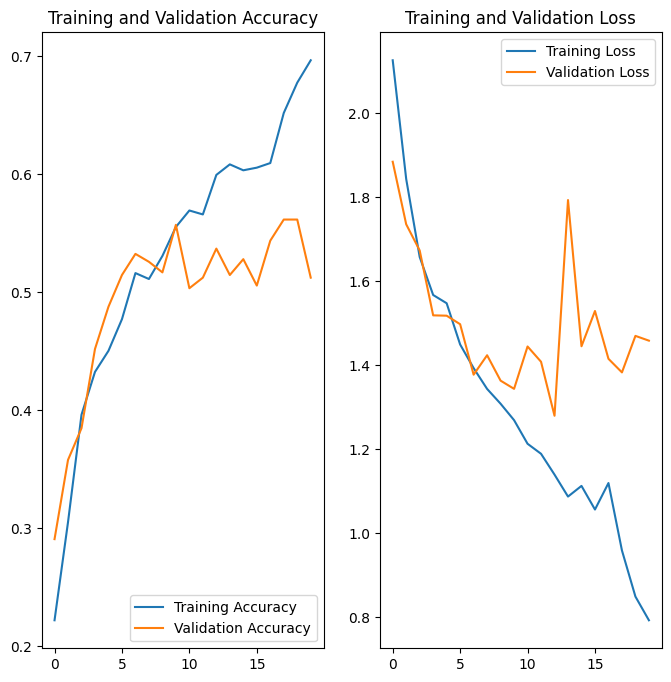

In [94]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.**

Findings:
The model is overfitting because we can see the difference in accuracy in training data & accuracy in the validation data that is almost 19%.

Inference: Data imbalance might be causing the bais to the model.

**Model 2 : Data Augumentation with drop out layer.**

In [95]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

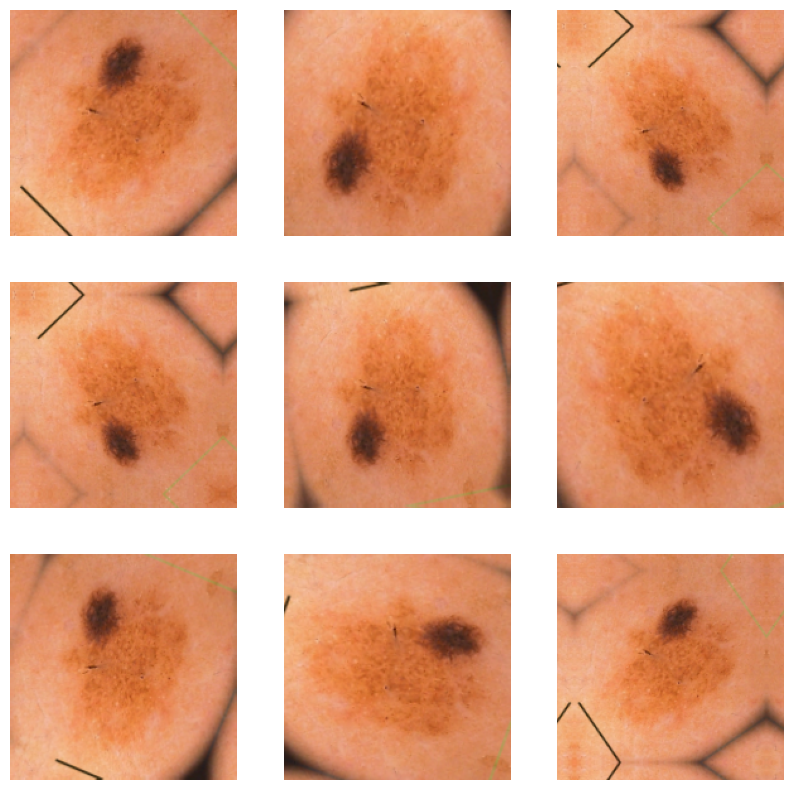

In [96]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [97]:
#

num_classes = 9
model = Sequential(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1.0/255,input_shape=(img_height,img_width,3)))

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.15))

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.20))

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))

In [99]:
#

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [100]:
#Train the model for ~20 epochs

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 71ms/step - loss: 2.1065 - accuracy: 0.1869 - val_loss: 2.0344 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 4s 68ms/step - loss: 2.0149 - accuracy: 0.2037 - val_loss: 1.9745 - val_accuracy: 0.2013
Epoch 3/20
56/56 [==============================] - 4s 69ms/step - loss: 1.9130 - accuracy: 0.2701 - val_loss: 1.7431 - val_accuracy: 0.3624
Epoch 4/20
56/56 [==============================] - 4s 66ms/step - loss: 1.7460 - accuracy: 0.3504 - val_loss: 1.6303 - val_accuracy: 0.4206
Epoch 5/20
56/56 [==============================] - 4s 75ms/step - loss: 1.6237 - accuracy: 0.4035 - val_loss: 1.6110 - val_accuracy: 0.4273
Epoch 6/20
56/56 [==============================] - 4s 80ms/step - loss: 1.6174 - accuracy: 0.4040 - val_loss: 1.6041 - val_accuracy: 0.4430
Epoch 7/20
56/56 [==============================] - 4s 78ms/step - loss: 1.5630 - accuracy: 0.4392 - val_loss: 1.4837 - val_accuracy: 0.4944
Epoch 8/20
56

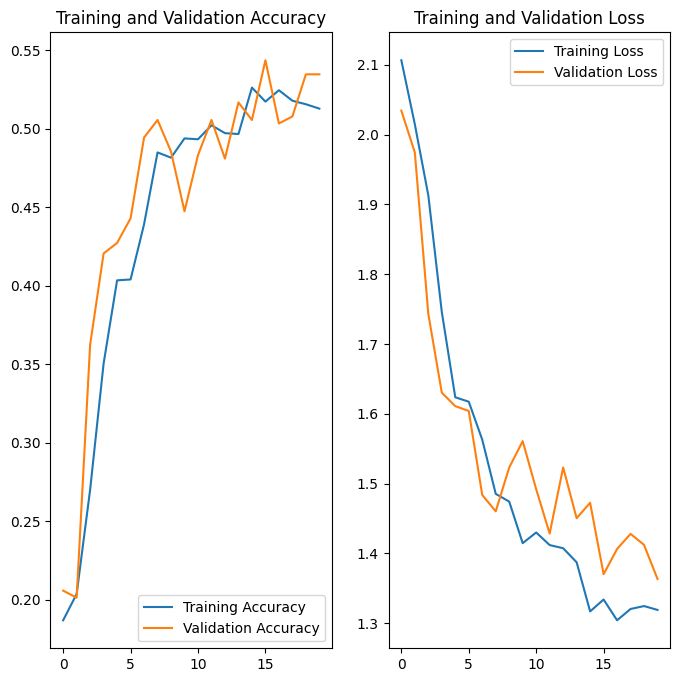

In [101]:
# Accuracy and loss plots

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations

- With data agumenatation and drop layer, the overfitting of the model is adressed to great extend. Earlier the train and validation accuracy difference was nearly 20%, with latest approach it's reduced to 2-3%.
- The accuracy of the model is has dropped.
- The accuracy can still be improved.

# Let's analyse the class imbalance of the data

total training image count = 2239 

-------------------------------------
Class name =  actinic keratosis
count      =  114
proportion =  0.05091558731576597
-------------------------------------
Class name =  basal cell carcinoma
count      =  376
proportion =  0.16793211255024565
-------------------------------------
Class name =  dermatofibroma
count      =  95
proportion =  0.04242965609647164
-------------------------------------
Class name =  melanoma
count      =  438
proportion =  0.19562304600267977
-------------------------------------
Class name =  nevus
count      =  357
proportion =  0.15944618133095131
-------------------------------------
Class name =  pigmented benign keratosis
count      =  462
proportion =  0.20634211701652524
-------------------------------------
Class name =  seborrheic keratosis
count      =  77
proportion =  0.03439035283608754
-------------------------------------
Class name =  squamous cell carcinoma
count      =  181
proportion =  0.08083966056

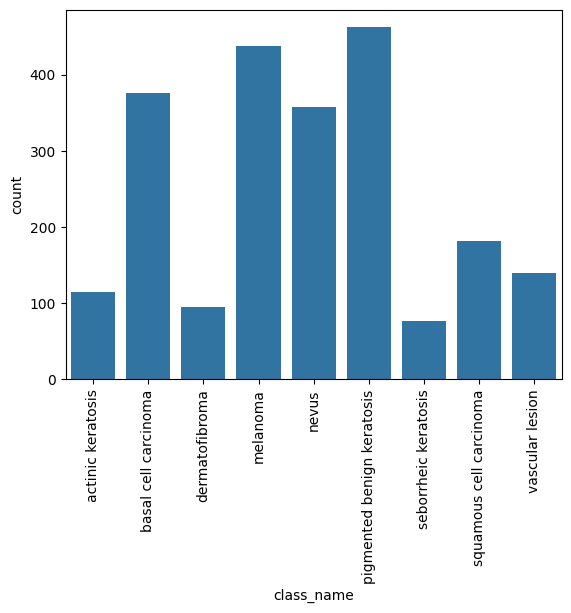

In [136]:
# Analysis of class imbalance

num_classes = len(class_names)
total = 0
all_count = []
class_name = []
for i in range(num_classes):
  count = len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))
  total += count
print("total training image count = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))
  print("Class name = ",class_names[i])
  print("count      = ",count)
  print("proportion = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])

temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

### Observations

- Data is hevily imbalance and hence due to that results and predictions will be baised.

# Augmentor : Class balance
- Using Augmentor (https://augmentor.readthedocs.io/en/master/) to create the equal distribution of the class.

In [103]:
!pip install Augmentor

In [153]:
import os
import shutil
import Augmentor

# Assuming TrainingData is your base folder for training images
path_to_training_dataset = '/content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Train'

# Output base directory for augmented images
output_base_directory = '/content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output/'

# Create Augmentor pipelines for each class
for i in class_names:
    source_directory = path_to_training_dataset + '/' + i
    output_directory = output_base_directory + i + '/output/'

    print(f"Checking source directory: {source_directory}")
    print(f"Checking output directory: {output_directory}")

    # Check if the source directory exists
    if not os.path.exists(source_directory):
        raise IOError(f"The source directory {source_directory} does not exist.")

    # Remove existing content in the output directory
    if os.path.exists(output_directory):
        shutil.rmtree(output_directory)

    # Recreate the output directory
    os.makedirs(output_directory)

    # Create Augmentor pipeline
    p = Augmentor.Pipeline(source_directory, output_directory=output_directory)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)

    # Sample 100 images
    p.sample(100)


Checking source directory: /content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Train/actinic keratosis
Checking output directory: /content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output/actinic keratosis/output/
Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output/actinic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79CBB62470D0>: 100%|██████████| 100/100 [00:04<00:00, 24.56 Samples/s]


Checking source directory: /content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Train/basal cell carcinoma
Checking output directory: /content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output/basal cell carcinoma/output/
Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output/basal cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79CB8C5E6FB0>: 100%|██████████| 100/100 [00:05<00:00, 16.90 Samples/s]


Checking source directory: /content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Train/dermatofibroma
Checking output directory: /content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output/dermatofibroma/output/
Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output/dermatofibroma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79CBB9B7ED40>: 100%|██████████| 100/100 [00:03<00:00, 30.19 Samples/s]


Checking source directory: /content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Train/melanoma
Checking output directory: /content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output/melanoma/output/
Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output/melanoma/output/.

Processing <PIL.Image.Image image mode=RGB size=3872x2592 at 0x79CBB640DD50>: 100%|██████████| 100/100 [00:18<00:00,  5.52 Samples/s]


Checking source directory: /content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Train/nevus
Checking output directory: /content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output/nevus/output/
Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output/nevus/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x79CBB656CC40>: 100%|██████████| 100/100 [00:17<00:00,  5.65 Samples/s]


Checking source directory: /content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Train/pigmented benign keratosis
Checking output directory: /content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output/pigmented benign keratosis/output/
Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output/pigmented benign keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79CBB9B7ED40>: 100%|██████████| 100/100 [00:03<00:00, 30.09 Samples/s]


Checking source directory: /content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Train/seborrheic keratosis
Checking output directory: /content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output/seborrheic keratosis/output/
Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output/seborrheic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x79CBB9B7FFD0>: 100%|██████████| 100/100 [00:08<00:00, 11.63 Samples/s]


Checking source directory: /content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Train/squamous cell carcinoma
Checking output directory: /content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output/squamous cell carcinoma/output/
Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output/squamous cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79CBB61D8040>: 100%|██████████| 100/100 [00:03<00:00, 26.84 Samples/s]


Checking source directory: /content/gdrive/My Drive/Colab Notebooks/CNN_assignment/Train/vascular lesion
Checking output directory: /content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output/vascular lesion/output/
Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output/vascular lesion/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79CBB656C6A0>: 100%|██████████| 100/100 [00:03<00:00, 31.82 Samples/s]


In [154]:
output_dir = pathlib.Path('/content/gdrive/My Drive/Colab Notebooks/CNN_augmented/output')
image_count_train = len(list(output_dir.glob('*/output/*.jpg')))
print(image_count_train)

900


total training image count = 900 

-------------------------------------
Class name =  actinic keratosis
count      =  100
proportion =  0.1111111111111111
-------------------------------------
Class name =  basal cell carcinoma
count      =  100
proportion =  0.1111111111111111
-------------------------------------
Class name =  dermatofibroma
count      =  100
proportion =  0.1111111111111111
-------------------------------------
Class name =  melanoma
count      =  100
proportion =  0.1111111111111111
-------------------------------------
Class name =  nevus
count      =  100
proportion =  0.1111111111111111
-------------------------------------
Class name =  pigmented benign keratosis
count      =  100
proportion =  0.1111111111111111
-------------------------------------
Class name =  seborrheic keratosis
count      =  100
proportion =  0.1111111111111111
-------------------------------------
Class name =  squamous cell carcinoma
count      =  100
proportion =  0.1111111111111111


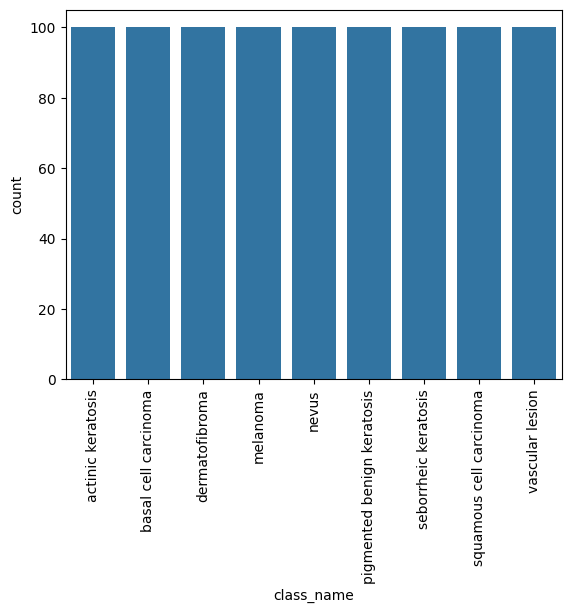

In [155]:
num_classes = len(class_names)
total = 0
all_count = []
class_name = []

for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg')))
  total += count
print("total training image count = {} \n".format(total))
print("-------------------------------------")
for i in range(num_classes):
  count = len(list(output_dir.glob(class_names[i]+'/output/*.jpg')))
  print("Class name = ",class_names[i])
  print("count      = ",count)
  print("proportion = ",count/total)
  print("-------------------------------------")
  all_count.append(count)
  class_name.append(class_names[i])


temp_df = pd.DataFrame(list(zip(all_count, class_name)), columns = ['count', 'class_name'])
sns.barplot(data=temp_df, y="count", x="class_name")
plt.xticks(rotation=90)
plt.show()

# Model 3 : Model with Class balance data.

In [156]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8420 files belonging to 9 classes.
Using 6736 files for training.


In [157]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8420 files belonging to 9 classes.
Using 1684 files for validation.


In [158]:
print(train_ds.class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [159]:
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling(1.0/255,input_shape=(img_height,img_width,3))])

model.add(Conv2D(32, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3,padding="same",activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.15))

model.add(Conv2D(256, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.20))

model.add(Conv2D(512, 3,padding="same",activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(units=num_classes, activation= 'softmax'))


In [160]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer= opt,
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [165]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
211/211 [==============================] - 49s 227ms/step - loss: 1.6998 - accuracy: 0.3452 - val_loss: 1.7035 - val_accuracy: 0.3741
Epoch 2/30
211/211 [==============================] - 49s 223ms/step - loss: 1.3995 - accuracy: 0.4390 - val_loss: 1.3422 - val_accuracy: 0.4590
Epoch 3/30
211/211 [==============================] - 49s 226ms/step - loss: 1.2472 - accuracy: 0.5068 - val_loss: 1.2264 - val_accuracy: 0.5160
Epoch 4/30
211/211 [==============================] - 50s 233ms/step - loss: 1.0883 - accuracy: 0.5787 - val_loss: 0.9541 - val_accuracy: 0.6508
Epoch 5/30
211/211 [==============================] - 48s 220ms/step - loss: 0.9411 - accuracy: 0.6456 - val_loss: 0.8891 - val_accuracy: 0.6633
Epoch 6/30
211/211 [==============================] - 50s 231ms/step - loss: 0.7821 - accuracy: 0.7078 - val_loss: 0.7720 - val_accuracy: 0.7239
Epoch 7/30
211/211 [==============================] - 48s 222ms/step - loss: 0.5883 - accuracy: 0.7754 - val_loss: 0.6704 - val_ac

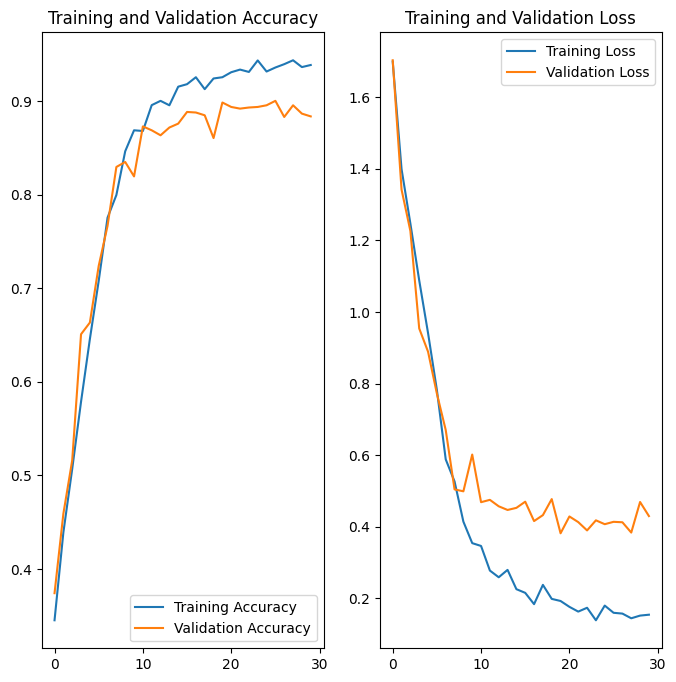

In [166]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observation/s
- After rebalance/resampling of the data (that gave equal proportion of data )and raised the accuray of the mdoel to 90%. This addressed the low accurty problem.
- Overfitting probelm is adressed and now difference between train and val set is nearly 4-5% diff.with these results it's conclusive that current module with rebalanced data is the best module.

# Evaluation

In [168]:
#Create a file to save models
top_model_weights_path = '/content/gdrive/My Drive/Colab Notebooks/CNN_models'
model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate(test_ds, batch_size=batch_size, \
                                            verbose=1)


print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))

4/4 [==============================] - 19s 174ms/step - loss: 5.4065 - accuracy: 0.4057
[INFO] accuracy: 40.57%
[INFO] Loss: 5.406548500061035
